In [1]:
import requests
from dotenv import load_dotenv
import os 
import json
import pandas as pd

In [2]:
load_dotenv()

True

In [3]:
#app_key ="32ceb39b0cbcf0a571ae43417a5e7d67"

#app_id= "f15069e8"
pagenum = 1
def pullpage(pagenum):
    charity_nav = f"https://api.data.charitynavigator.org/v2/Organizations?app_id=f15069e8&app_key=32ceb39b0cbcf0a571ae43417a5e7d67&pageNum={pagenum}&rated=true"
    response_data = requests.get(charity_nav)
    data = json.loads(response_data.content.decode("utf-8"))
    return(data)

data = pullpage(1)




#http://api.charitynavigator.org/api/v1/celebrity-orgs/?app_key=8594&app_id=8675309&format=JSON
    
    # /v2/Organizations?state=NJ&app_id=<appid>&app_key=<appkey>

In [4]:
new_data = {}
index = 0
for i in range(1,15):
    data = pullpage(i)
    


    for item in data:
        new_data[index] = {
            'charityName': item["charityName"],
            'rating': item["currentRating"]['rating'],
            'EIN': item["ein"],
            'mission': item["mission"],
            'websiteURL': item['websiteURL'],
        
        }
        index = index+1
print(new_data)

{0: {'charityName': 'Mount Desert Island Biological Laboratory', 'rating': 4, 'EIN': '010202467', 'mission': 'The MDI Biological Laboratory is a rapidly growing, independent non-profit biomedical research institution. Its mission is to improve human health and well-being through basic research, education, and development ventures that transform discoveries into cures.', 'websiteURL': 'http://www.mdibl.org/'}, 1: {'charityName': 'United Way of Eastern Maine', 'rating': 4, 'EIN': '010211478', 'mission': 'Working with the communities we serve, the United Way of Eastern Maine is a trusted catalyst for meaningful and lasting change that improves the lives of people in our region. We improve lives by mobilizing the caring power of people and communities. We aim to achieve measurable results in three areas:\r\n\r\nEducation: Children are Ready to Learn and Safe After School\r\nIncome: Families Safe and Secure\r\nHealth: Seniors are Independent and Active', 'websiteURL': 'https://www.unitedway

In [5]:
charity_nav = pd.DataFrame.from_dict(new_data, orient="index")
charity_nav

,charityName,rating,EIN,mission,websiteURL
0,Mount Desert Island Biological Laboratory,4,010202467,The MDI Biological Laboratory is a rapidly gro...,http://www.mdibl.org/
1,United Way of Eastern Maine,4,010211478,"Working with the communities we serve, the Uni...",https://www.unitedwayem.org/
2,The Jackson Laboratory,4,010211513,"The Jackson Laboratory, founded in 1929, is an...",http://www.jax.org
3,Maine Historical Society,1,010211530,"Founded in 1822, the Maine Historical Society ...",http://www.mainehistory.org/
4,Boys & Girls Clubs of Southern Maine,4,010211543,"For more than 100 years, Boys & Girls Clubs of...",http://www.bgcmaine.org/home
5,United Way of Androscoggin County,3,010211564,"Based in Lewiston, Maine, the United Way of An...",http://www.unitedwayandro.org/
6,Pine Tree Society,4,010212442,Pine Tree Society helps people in Maine with d...,http://www.pinetreesociety.org/
7,Animal Refuge League,3,010212541,The Animal Refuge League of Greater Portland n...,http://arlgp.org
8,Bangor Humane Society,3,010215910,Bangor Humane Society (BHS) was founded in 186...,http://www.bangorhumane.org
9,Maine Seacoast Mission,4,010216837,"The Maine Sea Coast Mission, founded in 1905, ...",http://www.seacoastmission.org/


In [6]:
rating = charity_nav['rating']
rating.head()

0    4
1    4
2    4
3    1
4    4
Name: rating, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import hvplot as hv
%matplotlib inline

In [15]:
charity_chart = (charity_nav.groupby('rating').size()/charity_nav['rating'].count())*100

charity_chart

rating
0     0.714286
1     2.928571
2    10.142857
3    47.428571
4    38.785714
dtype: float64

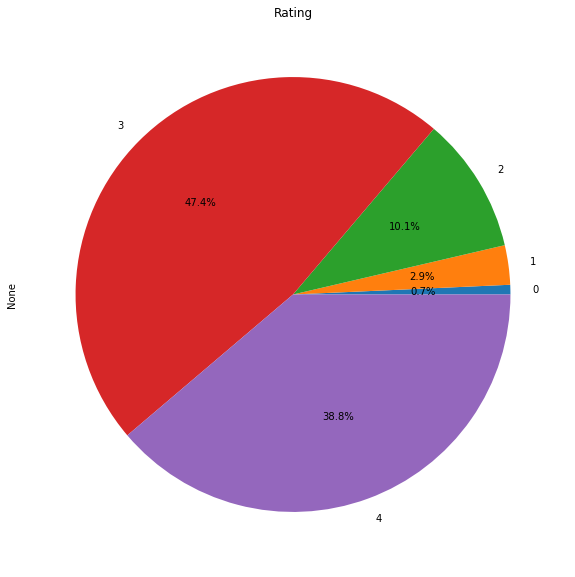

In [23]:
charity_chart.plot(kind='pie', title="Rating", autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(10,10)


In [35]:
charity_nav.sort_values(by=['rating'])

,charityName,rating,EIN,mission,websiteURL
1160,Jerusalem Fellowships,0,133740640,"Jerusalem Fellowships, established in 1985, is...",http://goisrael.org/
1029,The Rusty Staub Foundation,0,133340651,"Ever since its creation in 1985, the Rusty Sta...",http://www.rustystaubfoundation.com/
765,American Jewish Congress,0,131679610,The American Jewish Congress (AJ Congress) is ...,http://www.ajcongress.org
967,HonorBound Foundation,0,133102064,To support and provide education to veterans a...,https://www.honorboundfoundation.org/
1092,Just One Life/Nefesh Achat B'Yisrael,0,133533863,Just One Life/Nefesh Achat B'Yisrael was forme...,http://www.justonelife.org/
617,American Friends of Ateret Cohanim,0,112706563,American Friends of Ateret Cohanim provides fu...,http://www.jerusalemchai.org/
506,Life-Study Fellowship,0,061035622,"Founded in 1939, Life-Study Fellowship's missi...",http://www.lifestudyfellowship.org
819,National Cancer Center,0,131919715,"Founded in 1953, the focus of National Cancer ...",http://www.nationalcancercenter.org/
1089,The Creative Coalition,0,133517803,The Creative Coalition was formed for the char...,http://thecreativecoalition.org/
1131,Veterans Support Foundation,0,133648561,"Established in 1991, the Veterans Support Foun...",http://www.vsf-usa.org/
